In [1]:
from nbtemplate import display_header
display_header('REDSoX.ipynb')

### Revision status
file: REDSoX.ipynb not found in repository (path missing or new file not yet commited?).
        No versioning information can be displayed.

This document is git version controlled. The repository is available at https://github.com/X-raypol/ray-trace.
See git commit log for full revision history.

Code was last run with:

- MARXS ray-trace code version 1.2.dev764 (commit hash: 6f3dae6c5f from 2020-10-22)


In [2]:
from mayavi import mlab
mlab.init_notebook('x3d', 1000, 500, local=False)

Notebook initialized with x3d backend.


In [3]:
import numpy as np

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, QTable, vstack
import marxs.visualization.mayavi
from marxs.source import PointSource, FixedPointing
from marxs.visualization.mayavi import plot_object, plot_rays
from marxs import simulator

import sys
sys.path.append('../')
from redsox.redsox import PerfectRedsox, xyz2zxy

In [4]:
instrum = PerfectRedsox()
KeepProb = simulator.KeepCol('probability')
instrum.postprocess_steps.append(KeepProb)

my_source = PointSource(coords=SkyCoord(30., 30., unit='deg'), 
                        energy=(35 * u.Angstrom).to(u.keV, equivalencies=u.spectral()),
                        polarization=None,
                        geomarea=instrum.elements[0].area)
my_pointing = FixedPointing(coords=SkyCoord(30., 30., unit='deg'),
                            reference_transform=xyz2zxy)
expt = 20 * u.s
photons = my_source.generate_photons(expt)
photons = my_pointing(photons)

photons = instrum(photons)

/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/missions/mitsnl/catgrating.py:238: RuntimeWarning: divide by zero encountered in log
  trans = np.exp(np.log(l1transtab['transmission']) * l1_dims['bardepth'] / (1 * u.micrometer))
/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/math/geometry.py:238: RuntimeWarning: invalid value encountered in multiply
  interpos = pos + k[:, None] * dir  # broadcasting array
/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/math/geometry.py:246: RuntimeWarning: invalid value encountered in less_equal
  (np.abs(interpos_local[:, 0]) <= np.linalg.norm(self['v_y'])) &
/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/math/geometry.py:247: RuntimeWarning: invalid value encountered in less_equal
  (np.abs(i

## REDSoX: What is it?
REDSoX is a concept for soft X-ray polarimeter. Details about the instrument (science case, mission design, etc.) are described in several publications, [see Marshall et al (2018)](https://ui.adsabs.harvard.edu/abs/2018JATIS...4a1005M/abstract).  Here is a short summary to help with understanding the ray-trace results shown on these websites:

So far, X-ray polarimetry is a essentially an unexplored frontier. IXPE is planned to launch in 2021 and will provide the first observations for energies above 2 keV, but a number of sources (in particualr neutron stars) are expected to show strong polarization at softer energies. REDSoX (Rocket Experiment Demonstration soft X-ray polarimeter) is the concept for sounding rocket instrument. The focal length is 2.5 m. The instrument has a focussing optic which collimates the parallel X-rays from space into a converging beam. This beam hits critical angle transmission gratings, which are arranged such that the dispersed order lands on a multi-layer mirror. The spacing of the multi-layer mirror is laterally graded. If the gratings are positioned properly, photons will arrive at the mirror just at te position where the spacing is ideal for Bragg-reflection. The trick is that this mirror is inclined by 45 degrees and thus only photons of a specific polarization direction will be reflected. The full cirlce of the focussing optics is split into three different channels, eahc with its own set of gratings, multi-layer mirror and detector. In this way, several polarization directions can be observed simultaneously to determine the polarization angle on the sky.

## REDSoX: How does is look?
In this section, I show how the REDSoX setup looks. I start with an interactive 3D view, which can be zoomed and rotated with the mouse in all supported browsers, pressing "r" returns the view to the initial position. See [the X3DOM documentation](https://www.x3dom.org/documentation/interaction/) for a full list of supported mouse and keyboard commands. The ray-trace setup makes some simplifications. In particular, the mirror is not modeled in 3D, but approximated by a 2D lens. In the 3D view, the position of the mirror modules is just indicated schematically by a cylinder that has the same radius as the outermost mirror surface.  

This is a monochromatic simulation with photon energies of 0.3 keV. Only rays that are detected in the end are shown and rays are colored according to the grating diffraction order. The zeroth order is shown with gray rays, the first order with green rays. For each of the three polarimetry channels, the green rays bounce of the multilayer-mirror (purple) before they hit a detector (blue). The  forth detector (also blue) images the zeroth order. 

### Schematic model

At the scale of REDSoX, the focal plane is located so far from the mirror and the gratings and thus it is hard ot see the conceptual layout of all pieces in the same plot. Thus, I first show a conceptual layout of REDSoX with a much shortend focal length and incrased size for all elements and diffraction angles. (The figure is made with the same ray-trace code I'm using for the real REDSoX, but some parameters are unphysical or at least not technically feasable.)

In [5]:
2048 * 0.024

49.152

In [6]:
fig = mlab.figure(bgcolor=(.85, .85, .85))
mlab.clf()

out = plot_object(instrum, viewer=fig)

pos = instrum.KeepPos.format_positions()
ind = (photons['probability'] > 1e-3) & (photons['CCD_ID'] >= 0)
out = marxs.visualization.mayavi.plot_rays(pos[ind, :, :], scalar=photons['order'][ind], viewer=fig)

# move camera programatically mlab.view()
fig

/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/visualization/utils.py:104: MARXSVisualizationWarning: Skipping <function catsupportbars at 0x7fa1d71570e0>: No display dictionary found.
  MARXSVisualizationWarning)


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'detector position [mm]')

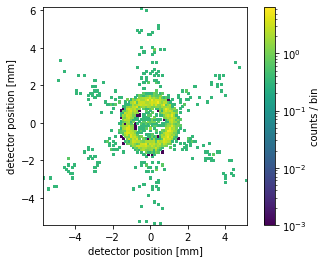

In [8]:
ind = photons['CCD_ID'] == 0
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
out = ax.hist2d(photons['det_x'][ind], photons['det_y'][ind], 
                weights=photons['probability'][ind], bins=100, norm=mpl.colors.LogNorm(vmin=1e-3))
cbar = plt.colorbar(out[-1], ax=ax)
cbar.set_label('counts / bin')
ax.set_ylabel('detector position [mm]')
ax.set_xlabel('detector position [mm]')

This figure shows the zeroth order for the same monoenergetic simulations shown in the rendering above. CCD 0 is placed below the focal plane because there is just not enough space to mount all CCDs and multi-layer mirrors so close to each other. As an added benefit, that reduces the risk of pile-up in the zeroth order be spreading out the zeroth order image into a ring. The L1 cross-dispersion bars of the gratings also disperse photons to a significant distance causing arms of the star pattern.

(0, 20)

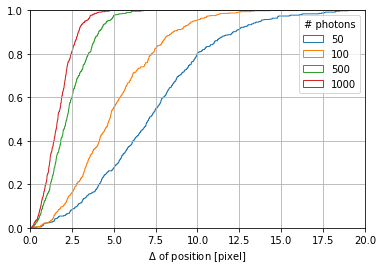

In [9]:
p0 = photons[photons['CCD_ID'] == 0]

fig, ax = plt.subplots()
from numpy.random import default_rng
rng = default_rng()

for size in [50, 100, 500, 1000]:
    d = np.zeros(500)
    for i in range(len(d)):
        inds = rng.choice(np.arange(len(p0)), size=size, replace=False)
        x0 = np.mean(p0['det_x'][inds])
        y0 = np.mean(p0['det_y'][inds])
        d[i] = np.sqrt(x0**2 + y0**2)
    ax.hist(d / 0.024, density=True, label=size, cumulative=True, histtype='step', bins=np.arange(0, 25, .001))
    ax.set_xlabel('$\Delta$ of position [pixel]')
ax.legend(title='# photons')
ax.grid(True)
ax.set_ylim(0, 1)
ax.set_xlim(0, 20)

Here is a relatively simple estimate on how accurate we can measure the position of the zeroth order to correct the pointing of the instrument in flight. From the single monoenergetic simulation above, we draw subsets of photons with a fixed number of photons. (We should run the simulation with more photons. Currently, there are about 5000 photons in CCD 0, so when I try to draw 500 distributions of 1000 photons each, there is a lot of repetition.) For each draw, we determine the mean position and compare the distance to the true focal point, located at (0,0) in this coordinate system. The figure shows the cumulative histogram of this distribution. We can see that in 90% of the realizations with 500 photons, we are going to find the true position to within 3 pixels. Other limitations in addition to the low number of simulated photons include the input spectum (this is a monoenergetic simulation), ignoring pile-up, and the absence of background.

## How might an observation look like?


In [10]:
from marxs.source.source import poisson_process
spectrum = Table.read('../inputdata/mk421_spec.txt', format='ascii.no_header',
                      names=['wave','fluxperwave'])
spectrum['wave'].unit = u.Angstrom
spectrum = QTable(spectrum)
spectrum['fluxperwave'].unit = 1 / u.cm**2 / u.s / u.Angstrom
spectrum['fluxperbin'] = spectrum['fluxperwave'] * np.hstack([0 * u.Angstrom, np.diff(spectrum['wave'])])
spectrum['energy'] = spectrum['wave'].to(u.keV, equivalencies=u.spectral())
spectrum.sort('energy')
spectrum['fluxdensity'] = spectrum['fluxperbin'] / np.hstack([0 * u.keV, np.diff(spectrum['energy'])])

spectrum = spectrum[(spectrum['wave'] > 25. * u.Angstrom) & (spectrum['wave'] < 80. * u.Angstrom)]
flux = np.sum(spectrum['fluxperbin'])
mk421coords = SkyCoord.from_name('Mk 421')
# Here we make 2 different sources at the same position
# A polarized source with 20% of the flux and an unpolarized source with 80% of the flusx
mk421pol = PointSource(coords=mk421coords, energy=spectrum, flux=poisson_process(flux * 0.2),
                       polarization=0 * u.degree,
                       geomarea=instrum.elements[0].area)
mk421unpol = PointSource(coords=mk421coords, energy=spectrum, flux=poisson_process(flux * 0.8),
                         polarization=None,
                         geomarea=instrum.elements[0].area)

photonspol = mk421pol.generate_photons(5 * u.min)
photonsunpol = mk421unpol.generate_photons(5 * u.min)
photons = vstack([photonspol, photonsunpol])
photons.sort('time')

/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [11]:
mk421_pointing = FixedPointing(coords=mk421coords, reference_transform=xyz2zxy)
photons = mk421_pointing(photons)
photons = instrum(photons)

In [12]:
photons['wave'] = (photons['energy']).to(u.Angstrom, equivalencies=u.spectral())
photdraw = photons[photons['probability'] > np.random.uniform(size=len(photons))]

Text(0, 0.5, 'expected flux [counts/$\\AA$]')

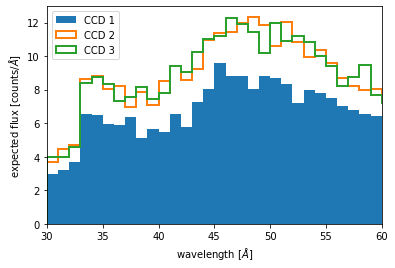

In [13]:
fig, ax = plt.subplots()

histkwargs = {1: {'lw': 0},
              2: {'lw': 2, 'histtype': 'step'},
              3: {'lw': 2, 'histtype': 'step'}}

for i in range(1,4):
    ind = (photons['CCD_ID'] == i)
    out = ax.hist(photons['wave'][ind], weights=photons['probability'][ind],
                  bins=np.arange(30, 80, 1), label=f'CCD {i}', **histkwargs[i])


ax.set_xlim(30, 60)
ax.legend(loc='upper left')
ax.set_xlabel('wavelength [$\AA$]')
ax.set_ylabel('expected flux [counts/$\AA$]')

This figure shows the simulated signal in each of the three channels. In this orientation, the CCD 1 has a much lower signal than the remaining channels. Polarization fraction and angle could be determined from this data. Any Monte-Carlo simulation, such as MARXS ray-tracing, has Poisson noise that makes the spectrum a little random. However, it is no the full picuture, because MARXS tracks the survival probability and uses that a a photon "weight". Thus, the figure shows non-integer photon numbers and does not account for the full effect of Poisson counting statistics.

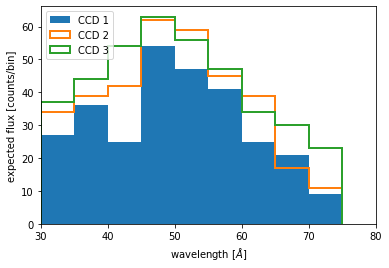

In [14]:
fig, ax = plt.subplots()

histkwargs = {1: {'lw': 0},
              2: {'lw': 2, 'histtype': 'step'},
              3: {'lw': 2, 'histtype': 'step'}}

for i in range(1,4):
    ind = (photdraw['CCD_ID'] == i)
    out = ax.hist(photdraw['wave'][ind],
                  bins=np.arange(30, 80, 5), label=f'CCD {i}', **histkwargs[i])


ax.set_xlim(30, 80)
ax.legend(loc='upper left')
ax.set_xlabel('wavelength [$\AA$]')
ax.set_ylabel('expected flux [counts/bin]')
fig.savefig('../figures/mk421.pdf')

This figure is the same as the previous one, except that here photons are actually drawn from the distribution, so the number of photons is an ingeter. Not everyray has the same probabiity of being chosen, so the number of rays that go into this figure is smaller than in the previous figure and thus the spectrum is more noisy.

## A modulation curve for one energy

In this section, I simulate a source that's 100% polarized. Then, I turn the pointing of the instrument on the sky in small steps so that we can build up the modulation curve. From this curve, the total modulation of the signal can be calcualted as $\frac{T-B}{T + B}$, where $T$ is the maximum of the curve and $B$ is the minimum.

In [15]:
e = 0.3 * u.keV
n_photons = 1e4
ang = np.arange(0.,  2 * np.pi, .15) * u.rad
pol = np.zeros((len(ang), 3))
for i, a in enumerate(ang):
    mysource = PointSource(coords=SkyCoord(30., 30., unit='deg'),
                            energy=e, polarization=a)
    photons = mysource.generate_photons(n_photons * u.s)
    photons = my_pointing(photons)
    photons = instrum(photons)
    for j in range(3):
        pol[i, j] = photons['probability'][photons['CCD_ID'] == j + 1].sum()

/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/math/geometry.py:238: RuntimeWarning: invalid value encountered in multiply
  interpos = pos + k[:, None] * dir  # broadcasting array
/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/math/geometry.py:246: RuntimeWarning: invalid value encountered in less_equal
  (np.abs(interpos_local[:, 0]) <= np.linalg.norm(self['v_y'])) &
/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/math/geometry.py:247: RuntimeWarning: invalid value encountered in less_equal
  (np.abs(interpos_local[:, 1]) <= np.linalg.norm(self['v_z'])))


(0, 1.0490982736356478)

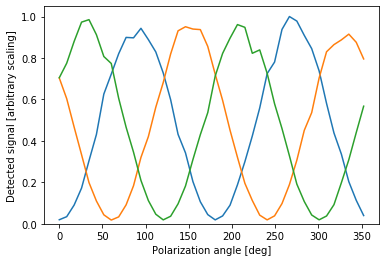

In [16]:
plt.plot(ang.to(u.deg), pol / pol.max())
plt.xlabel('Polarization angle [deg]')
plt.ylabel('Detected signal [arbitrary scaling]')
plt.ylim(0, None)

REDSoX has three different channels, rotated by 120 degrees with respect to each other, so the three modulation curves are shifted with respect to each other.

## Effective area and modulation factor

We can now run the calculation of the effective area and the modulation over a range of wavelengths.

In [17]:
# The redsox model is run without optical blocking filter, but we wan to show what
# 50 nm of Al (e.g. directly deposited on CCD) would do.

from scipy.interpolate import interp1d

al = Table.read('../inputdata/aluminium_transmission_50nm.txt',
                format='ascii.no_header',
                data_start=2, names=['energy', 'transmission'])
al['wave'] = (al['energy'] * u.eV).to(u.Angstrom, equivalencies=u.spectral())
alfilter = interp1d(al['wave'], al['transmission'])

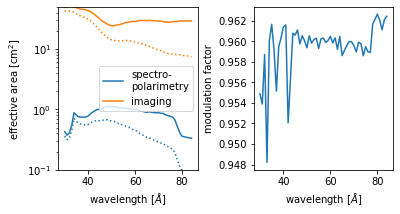

In [18]:
# Actually, we run this simulation in an external script 
# because of how long it takes to run and read in results from a file here
point_fixed = Table.read('../run_results/redsox_aeff_mod.fits')

wave = point_fixed[0]['wavelength']

fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
for i in [1, 0]:
    line = ax1.plot(wave, point_fixed[0]['Aeff'][:, i] * instrum.elements[0].area.to(u.cm**2), 
                    label=['imaging', 'spectro-\npolarimetry'][i])
    ax1.plot(wave, alfilter(wave) * point_fixed[0]['Aeff'][:, i] * instrum.elements[0].area.to(u.cm**2),
             ls=':', c=line[0].get_color(), label='__no_label__')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xlabel('wavelength [$\AA$]')
ax1.set_ylabel('effective area [cm$^2$]')
#ax1.set_xlim([25, 60])
ax1.set_ylim([.1, 50])
#ax1.xaxis.set_major_locator( MaxNLocator(nbins=5) )
#ax1.grid()
    
ax2 = fig.add_subplot(122)
ax2.plot(wave, point_fixed[0]['modulation'][:, 1])
ax2.set_xlabel('wavelength [$\AA$]')
ax2.set_ylabel('modulation factor')
#ax2.set_xlim([25, 60])
#ax2.set_ylim([.7, 1])
#ax2.xaxis.set_major_locator( MaxNLocator(nbins=5) )
#ax2.grid()
    
fig.subplots_adjust(wspace=0.4)
#fig.savefig('../redsoxplots/aeff.pdf', bbox_inches='tight')
#fig.savefig('../redsoxplots/aeff.png', bbox_inches='tight')

In [19]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


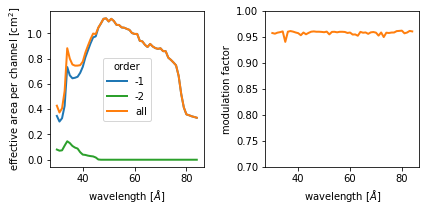

In [20]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)

orders = ['all', 0, -1, -2]
colors = ['#ff7f0e', '#d62728', '#1f77b4', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lines = []
for i in [2, 3, 0]:
    line = ax1.plot(wave, point_fixed[i]['Aeff'][:, 1] * instrum.elements[0].area.to(u.cm**2), 
                    label=orders[i], lw=2, c=colors[i])
    lines.append(line[0])
    #ax1.plot(wave, alfilter(wave) * point_fixed[i]['Aeff'][:, 1] * instrum.elements[0].area.to(u.cm**2),
    #         ls=':', c=lines[-1].get_color(), label='__no_label__')
ax1.legend(title='order')
#ax1.set_yscale('log')
ax1.set_xlabel('wavelength [$\AA$]')
ax1.set_ylabel('effective area per channel [cm$^2$]')
#ax1.set_xlim([25, 60])
#ax1.set_ylim([.1, 50])
#ax1.xaxis.set_major_locator( MaxNLocator(nbins=5) )
#ax1.grid()
    
ax2 = fig.add_subplot(122)
for i in [2]:
    ax2.plot(wave, point_fixed[i]['modulation'][:, 1], label=orders[i], c=lines[i].get_color(), lw=2)
ax2.set_xlabel('wavelength [$\AA$]')
ax2.set_ylabel('modulation factor')
#ax2.set_xlim([25, 60])
ax2.set_ylim([0.7, 1])
#ax2.xaxis.set_major_locator( MaxNLocator(nbins=5) )
#ax2.grid()
    
fig.subplots_adjust(wspace=0.4, right=.98, bottom=.2, top=.92)
fig.savefig('../figures/Aeff_noOBF.pdf')

*left*: Effective area per polarimetry channel. Solid lines are for the base configuration, dashed lines include an additional optical blocking filter of 50 mn aluminium. The spectropolarimeter is optimized to maximize the signal in the first order, but some second order photons will also be reflected at short wavelength. *Right*: The modulation factor is constant with energy (the noise seen is due to the finite number of rays in the Monte-Carlo ray-trace simulations).

In [21]:
np.sum(point_fixed[0]['Aeff'][:, 1] * instrum.elements[0].area.to(u.cm**2)) * 3

<Quantity 135.34243529 cm2>

In [22]:
point_fixed[0]['Aeff'][:, 1] * instrum.elements[0].area.to(u.cm**2)

<Quantity [0.42736665, 0.37357133, 0.40652254, 0.54378541, 0.88227783,
           0.79885748, 0.75314032, 0.74418309, 0.74445671, 0.74781203,
           0.77621994, 0.84724622, 0.90183163, 0.95385465, 0.99790716,
           0.99379308, 1.04561556, 1.07789449, 1.11465887, 1.11817348,
           1.09353657, 1.11449035, 1.09724624, 1.06714016, 1.0658169 ,
           1.04655315, 1.04402755, 1.03504938, 1.02715562, 1.00198471,
           0.99505287, 0.99497366, 0.94094251, 0.93593237, 0.90875938,
           0.89164321, 0.91614351, 0.89578125, 0.88308884, 0.87706113,
           0.8813277 , 0.858835  , 0.85835677, 0.80729071, 0.79004385,
           0.76938083, 0.74646823, 0.6634632 , 0.51920517, 0.41346349,
           0.35860492, 0.35200152, 0.3438147 , 0.3382212 , 0.33211999] cm2>

In [23]:
instrum.elements

In [24]:
from redsox.pisox import PerfectPisox, PiGrid
pisox = PerfectPisox()
pisox.elements

/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/missions/mitsnl/catgrating.py:238: RuntimeWarning: divide by zero encountered in log
  trans = np.exp(np.log(l1transtab['transmission']) * l1_dims['bardepth'] / (1 * u.micrometer))


 <function redsox.pisox.outsidemirror(photons)>,
 <function redsox.pisox.effective_baffle(photons)>]

In [25]:
def first_of_class_top_level(elements, cls, subclass_ok=False): 
    for i, e in enumerate(elements):
        if subclass_ok:
            compfunc = lambda a, b: isinstance(a, b)
        else:
            compfunc = lambda a, b: type(a) == b
        if compfunc(e, cls):
            return i
        elif hasattr(e, 'elements_of_class') and len(e.elements_of_class(cls, subclass_ok)) > 0:
            return i

In [26]:
first_of_class_top_level(pisox.elements, PiGrid)

3

In [27]:
pisox.elements[3].elements

 <function marxs.missions.mitsnl.catgrating.catsupportbars(photons)>]

In [28]:
def elements_of_class(self, cls, subclass_ok=False, stop_at_first=False):
        if subclass_ok:
            compfunc = lambda a, b: isinstance(a, b)
        else:
            compfunc = lambda a, b: type(a) == b
        a = []
        if compfunc(self, cls):
            a += [self]
            if stop_at_first:
                return a

        for e in self.elements:
            if compfunc(e, cls):
                a += [e]
            elif hasattr(e, 'elements_of_class'):
                a += e.elements_of_class(cls, subclass_ok)
        return a


In [29]:
from marxs.source.source import poisson_process
from marxs.source import Source

wave = np.arange(20, 80, .1) * u.Angstrom
en = wave.to(u.keV, equivalencies=u.spectral())
fluxdensity = en.value[1:]**(2) / u.s / u.cm**2 / np.abs(np.diff(en))

# Input as astropy QTable
continuum = QTable([en, wave], names=['energy', 'wave'])
continuum['fluxdensity'] = 0 * fluxdensity.unit
continuum['fluxdensity'][1:] = fluxdensity
continuum.sort('energy')
ind = (continuum['wave'] > 40 * u.Angstrom) & (continuum['wave'] < 45 * u.Angstrom)
absline = continuum[ind]
absline['fluxdensity'] = 0.25 * absline['fluxdensity']
continuum['fluxdensity'][ind] =  0.25 * continuum['fluxdensity'][ind]

NameError: name 'tablespectrum' is not defined

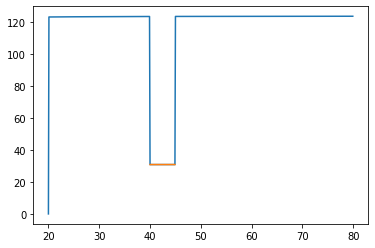

In [30]:
plt.plot(continuum['wave'], continuum['fluxdensity'])
plt.plot(absline['wave'], absline['fluxdensity'])

In [ ]:
# Here we make 2 different sources at the same position with different polarization properties
# A polarized source with 20% of the flux and an unpolarized source with 80% of the flusx
nsunpol = PointSource(coords=SkyCoord(30., 30., unit='deg'), energy=continuum,
                      flux=np.sum(continuum['fluxdensity'][1:] * np.diff(continuum['energy'])),
                       polarization=None)
nspol = PointSource(coords=SkyCoord(30., 30., unit='deg'), energy=absline, 
                    flux=np.sum(absline['fluxdensity'][1:] * np.diff(absline['energy'])),
                         polarization=0 * u.degree)

photonspol = nspol.generate_photons(150 * u.min)
photonsunpol = nsunpol.generate_photons(150 * u.min)
photons = vstack([photonspol, photonsunpol])
photons.sort('time')
len(photons)

In [ ]:
ns_pointing = FixedPointing(coords=SkyCoord(30., 30., unit='deg'), reference_transform=xyz2zxy)
photons = ns_pointing(photons)
photons = instrum(photons)
photons['wave'] = (photons['energy']).to(u.Angstrom, equivalencies=u.spectral())
photdraw = photons[photons['probability'] > np.random.uniform(size=len(photons))]

In [ ]:
fig, ax = plt.subplots()

for i in range(1,4):
    ind = (photons['CCD_ID'] == i)
    out = ax.hist(photons['wave'][ind], weights=photons['probability'][ind],
                  bins=np.arange(30, 80, 1), label=f'CCD {i}', **histkwargs[i])


ax.set_xlim(30, 60)
ax.legend(loc='upper left')
ax.set_xlabel('wavelength [$\AA$]')
ax.set_ylabel('expected flux [counts/$\AA$]')

In [ ]:
fig, ax = plt.subplots()
for i in range(1,4):
    ind = (photdraw['CCD_ID'] == i)
    print(ind.sum())
    out = ax.hist(photdraw['wave'][ind],
                  bins=np.arange(31, 80, 1.5), label=f'CCD {i}', **histkwargs[i])


ax.set_xlim(30, 80)
ax.legend()
ax.set_xlabel('wavelength [$\AA$]')
ax.set_ylabel('expected flux [counts/bin]')
fig.savefig('../figures/absline.pdf')

In [ ]:
Ageom = instrum.elements[0].area

In [ ]:
tab = Table.read('../run_results/redsox/scatter.fits')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
t_wave = tab.group_by('wave')
    
for key, g in zip(t_wave.groups.keys, t_wave.groups):
        x = np.rad2deg(g['inplanescatter'])*60*2.35
        ax.plot(x,g['Aeff_channel'], label='{:2.0f} $\AA$'.format(key[0]), lw=2)
ax.set_ylabel('$A_{eff}$ [cm$^2$] per channel (dotted lines)')
ax.set_xlabel('mirror HPD [arcmin]')
ax.legend()
out = ax.set_xlim([0, 5])
fig.savefig('../figures/mirrorpsf.pdf')

In [35]:
from redsox.pisox import PerfectPisox, PiGrid
from marxs.source import JitterPointing, PointSource
def filter_noCCD(photons):
    photons['probability'][~np.isfinite(photons['det_x'])] = 0
    return photons


In [36]:
class Pisox(PerfectPisox):
    def post_process(self):
        return []

    def __init__(self):
        super().__init__()
        self.elements.insert(0, JitterPointing(coords=SkyCoord(30., 0., unit='deg'),
                                               reference_transform=xyz2zxy,
                                               jitter=0 * u.arcsec))
        self.elements.append(filter_noCCD)

        # Shift the center of the grating assembly to the
        # position where the axes intersect the stair
        grids = self.elements_of_class(PiGrid)
        shift = np.eye(4)
        shift[2, 3] = grids[0].z_from_xy(0, 0)
        for e in grids:
            e.move_center(shift)



In [37]:
pisox = Pisox()

/Users/hamogu/anaconda3/envs/marxs/lib/python3.7/site-packages/marxs-1.2.dev0-py3.7-macosx-10.9-x86_64.egg/marxs/missions/mitsnl/catgrating.py:238: RuntimeWarning: divide by zero encountered in log
  trans = np.exp(np.log(l1transtab['transmission']) * l1_dims['bardepth'] / (1 * u.micrometer))


In [43]:
instrum.elements[1]

In [41]:
pisox.elements[2].elements[0].elements

AttributeError: 'PiLens' object has no attribute 'elements'